# Data Gathering

This recipe shows how we will be accessing the datasets necessary for the rest of the book.

We start by loading the necessary libraries and resetting the computational graph.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

## The Iris Dataset (R. Fisher / Scikit-Learn)
鸢尾花数据集：包含山鸢尾、变色鸢尾和维吉尼亚鸢尾各自的花萼和花瓣的长度和宽度。总共有150个数据集，每类50个样本。

One of the most frequently used ML datasets is the iris flower dataset.  We will use the easy import tool, `datasets` from scikit-learn.  You can read more about it here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(len(iris.data))
print(len(iris.target))
print(iris.data[0])
print(set(iris.target))

150
150
[ 5.1  3.5  1.4  0.2]
{0, 1, 2}


In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

## Low Birthrate Dataset (Hosted on Github)
此样本数据集是婴儿出生体重以及母亲和家庭历史人口统计学、医学指标，有189个样本集，包含11个特征。

The 'Low Birthrate Dataset' is a dataset from a famous study by Hosmer and Lemeshow in 1989 called, "Low Infant Birth Weight Risk Factor Study".  It is a very commonly used academic dataset mostly for logistic regression.  We will host this dataset on the public Github here:
https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat

In [28]:
import requests

birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
birth_file = requests.get(birthdata_url)
birth_data = birth_file.text.split('\r\n')
birth_header = birth_data[0].split('\t')
birth_data = [[float(x) for x in y.split('\t') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
print(len(birth_data))
print(len(birth_data[0]))

189
9


## Housing Price Dataset (UCI)

波士顿房价数据集，保存在卡内基梅隆大学机器学习仓库，总共有506个房价样本，包含14个特征向量。

We will also use a housing price dataset from the University of California at Irvine (UCI) Machine Learning Database Repository. It is a great regression dataset to use.  You can read more about it here:
https://archive.ics.uci.edu/ml/datasets/Housing

In [5]:
import requests

housing_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_file = requests.get(housing_url)
housing_data = [[float(x) for x in y.split(' ') if len(x)>=1] for y in housing_file.text.split('\n') if len(y)>=1]
print(len(housing_data))
print(len(housing_data[0]))

506
14


## MNIST Handwriting Dataset (Yann LeCun)

MNIST手写体字库：是NIST手写体字库的子样本数据集。包含 $70\,000$ 张 $0$ 到 $9$ 的图像,其中 $60\,000$ 张标注为训练样本数据集，$10\,000$ 张为测试样本数据集。

The MNIST Handwritten digit picture dataset is the `Hello World` of image recognition. The famous scientist and researcher, Yann LeCun, hosts it on his webpage here, http://yann.lecun.com/exdb/mnist/ .  But because it is so commonly used, many libraries, including TensorFlow, host it internally.  We will use TensorFlow to access this data as follows.

If you haven't downloaded this before, please wait a bit while it downloads

TensorFlow从训练样本数据集中留出 $5\,000$ 张图片验证样本数据集。

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("E:/datasets/MNIST_data/", one_hot=True)
print(len(mnist.train.images))
print(len(mnist.test.images))
print(len(mnist.validation.images))
print(mnist.train.labels[1,:])

Extracting E:/datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting E:/datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting E:/datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting E:/datasets/MNIST_data/t10k-labels-idx1-ubyte.gz
55000
10000
5000
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


## CIFAR-10 Data

The CIFAR-10 data ( https://www.cs.toronto.edu/~kriz/cifar.html ) contains 60,000 32x32 color images of 10 classes collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.  Alex Krizhevsky maintains the page referenced here.  This is such a common dataset, that there are built in functions in TensorFlow to access this data (the keras wrapper has these commands). Note that the keras wrapper for these functions automatically splits the images into a 50,000 training set and a 10,000 test set.

由CIFAR机构发布的8亿张彩色图片(已标注为, $32\times32$ 像素)的子集, 总共分 $10$ 类, $60\,000$ 张图片, $50\,000$ 张图片训练数据集,
$10\,000$ 张图片测试数据集。

In [32]:
from PIL import Image
# Running this command requires an internet connection and a few minutes to download all the images.
(X_train, y_train), (X_test, y_test) = tf.contrib.keras.datasets.cifar10.load_data()

The ten categories are (in order):

<ol start="0">
  <li>Airplane</li>
  <li>Automobile</li>
  <li>Bird</li>
  <li>Car</li>
  <li>Deer</li>
  <li>Dog</li>
  <li>Frog</li>
  <li>Horse</li>
  <li>Ship</li>
  <li>Truck</li>
</ol>

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[0,] # this is a frog

array([6], dtype=uint8)

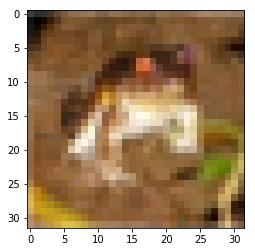

In [11]:
# Plot the 0-th image (a frog)
%matplotlib inline
img = Image.fromarray(X_train[0,:,:,:])
plt.imshow(img)

## Ham/Spam Texts Dataset (UCI)

We will use another UCI ML Repository dataset called the SMS Spam Collection.  You can read about it here: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection .  As a sidenote about common terms, when predicting if a data point represents 'spam' (or unwanted advertisement), the alternative is called 'ham' (or useful information).

This is a great dataset for predicting a binary outcome (spam/ham) from a textual input.  This will be very useful for short text sequences for Natural Language Processing (Ch 7) and Recurrent Neural Networks (Ch 9).

垃圾短信文本数据集：

In [33]:
import requests
import io
from zipfile import ZipFile

# Get/read zip file
zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
r = requests.get(zip_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('SMSSpamCollection')
# Format Data
text_data = file.decode()
text_data = text_data.encode('ascii',errors='ignore')
text_data = text_data.decode().split('\n')
text_data = [x.split('\t') for x in text_data if len(x)>=1]
[text_data_target, text_data_train] = [list(x) for x in zip(*text_data)]
print(len(text_data_train))
print(set(text_data_target))
print(text_data_train[1])

5574
{'ham', 'spam'}
Ok lar... Joking wif u oni...


## Movie Review Data (Cornell)

The Movie Review database, collected by Bo Pang and Lillian Lee (researchers at Cornell), serves as a great dataset to use for predicting a numerical number from textual inputs.

You can read more about the dataset and papers using it here:
https://www.cs.cornell.edu/people/pabo/movie-review-data/

影评样本数据集：电影观看者的影评

In [34]:
import requests
import io
import tarfile

movie_data_url = 'http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
r = requests.get(movie_data_url)
# Stream data into temp object
stream_data = io.BytesIO(r.content)
tmp = io.BytesIO()
while True:
    s = stream_data.read(16384)
    if not s:  
        break
    tmp.write(s)
stream_data.close()
tmp.seek(0)
# Extract tar file
tar_file = tarfile.open(fileobj=tmp, mode="r:gz")
pos = tar_file.extractfile('rt-polaritydata/rt-polarity.pos')
neg = tar_file.extractfile('rt-polaritydata/rt-polarity.neg')
# Save pos/neg reviews
pos_data = []
for line in pos:
    pos_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
neg_data = []
for line in neg:
    neg_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
tar_file.close()

print(len(pos_data))
print(len(neg_data))
print(neg_data[0])

5331
5331
simplistic , silly and tedious . 



## The Complete Works of William Shakespeare (Gutenberg Project)

For training a TensorFlow Model to create text, we will train it on the complete works of William Shakespeare.  This can be accessed through the good work of the Gutenberg Project.  The Gutenberg Project frees many non-copyright books by making them accessible for free from the hard work of volunteers.

You can read more about the Shakespeare works here:
http://www.gutenberg.org/ebooks/100

莎士比亚著作文本数据集：由古登堡数字电子书计划提供的免费电子书籍，他们编译了莎士比亚所有著作。

In [35]:
# The Works of Shakespeare Data
import requests

shakespeare_url = 'http://www.gutenberg.org/cache/epub/100/pg100.txt'
# Get Shakespeare text
response = requests.get(shakespeare_url)
shakespeare_file = response.content
# Decode binary into string
shakespeare_text = shakespeare_file.decode('utf-8')
# Drop first few descriptive paragraphs.
shakespeare_text = shakespeare_text[7675:]
print(len(shakespeare_text))

5582212


## English-German Sentence Translation Database (Manythings/Tatoeba)

The Tatoeba Project is also run by volunteers and is set to make the most bilingual sentence translations available between many different languages.  `Manythings.org` compiles the data and makes it accessible.

http://www.manythings.org/corpus/about.html#info

More bilingual sentence pairs: http://www.manythings.org/bilingual/

英德句子翻译样本集：由Tatoeba（在线翻译数据库）发布，ManyThing.org(http://www.manythings.org)整理并提供下载。

你可以通过改变URL, 使用你需要的任何语言的文本文件：

In [ ]:
# English-German Sentence Translation Data
import requests
import io
from zipfile import ZipFile
sentence_url = 'http://www.manythings.org/anki/deu-eng.zip'
r = requests.get(sentence_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('deu.txt')
# Format Data
eng_ger_data = file.decode()
eng_ger_data = eng_ger_data.encode('ascii',errors='ignore')
eng_ger_data = eng_ger_data.decode().split('\n')
eng_ger_data = [x.split('\t') for x in eng_ger_data if len(x)>=1]
[english_sentence, german_sentence] = [list(x) for x in zip(*eng_ger_data)]
print(len(english_sentence))
print(len(german_sentence))
print(eng_ger_data[10])